## Proyecto juegos cooperativos

Ana Sofia Hinojosa Bale

Julia Hernández Cárdenas

In [1]:
import pandas as pd
import random
import numpy as np
import itertools
import matplotlib.pyplot as plt 

payoff_matrix = {
    'C': {'C': (3, 3), 'NC': (5, 0)},
    'NC': {'C': (0, 5), 'NC': (1, 1)}
}

df_game = pd.DataFrame(payoff_matrix)
df_game

,C,NC
C,"(3, 3)","(0, 5)"
NC,"(5, 0)","(1, 1)"


Joss: Inicia cooperando y en el segundo turno copia la respuesta del adversario del turno anterior. Cada diez turnos elige aleatoriamente cooperar o no cooperar.

Gradshamps: Es como Joss, pero cada 5 jugadaas no coopera.

Tit for tat: Inicia cooperando y en el segundo juego copia la respuesta del adversario en el turno anterior.

In [2]:
prueba = [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]  
rondas = list(range(1, len(prueba) + 1))

def aleatorio_j(prueba, rondas):
    a = []
    for t in rondas:
        a.append(random.choice([0, 1]))
    return a

def friendman(prueba, rondas):
    a = []  
    coopera = True  

    for t in range(len(rondas)):
        if coopera:
            a.append(1)
            if prueba[t] == 0:
                coopera = False  
        else:
            a.append(0) 
    return a

def joss(prueba, rondas):
    a = []
    for i, t in enumerate(rondas):
        if i == 0:
            a.append(1)
            continue

        if t % 10 == 0:
            a.append(1 if random.choice([True, False]) else 0)
            continue

        a.append(prueba[i-1])

    return a

def gradshamps(prueba, rondas):
    a = []
    for i, t in enumerate(rondas):
        if i == 0:
            a.append(1)
            continue

        if t % 5 == 0:
            a.append(0)
            continue

        a.append(prueba[i-1])

    return a

def tft(prueba, rondas):
    a = []
    for i, t in enumerate(rondas):
        if i == 0:
            a.append(1)
            continue

        a.append(prueba[i-1])

    return a

def tf2t(prueba, rondas):
    a = []
    for i in range(len(rondas)):
        if i == 0:
            a.append(1)
            continue
        if i >= 2 and prueba[i-1] == 0 and prueba[i-2] == 0:
            a.extend([1, 1])
            continue
        elif prueba[i-1] == 0:
            a.append(0)
            continue
        else:
            a.append(1)

    return a

def malvado(prueba, rondas):
    a = []
    a.extend([1]*5)

    n = len(prueba)
    i = 5  

    while True:
        if i >= n:
            a.extend([1]*5)
            break

        last = prueba[i-1]
        a.extend([last]*5)
        i += 5

    if len(a) > len(prueba):
        a = a[:len(prueba)]
    return a

def bueno(prueba, rondas):
    a = []
    for i in range(len(rondas)):
        if i == 0:
            a.append(1)
            continue
        # Si el oponente traicionó dos veces seguidas, castigo con 0
        if i >= 2 and prueba[i-1] == 0 and prueba[i-2] == 0:
            a.append(0)
        else:
            a.append(1)
    return a

def malo(prueba, rondas):
    a = []
    for i, t in enumerate(rondas):
        if i == 0:
            a.append(0)  # empieza traicionando
            continue
        # Cada 3 turnos, traiciona
        if (i+1) % 3 == 0:
            a.append(0)
        else:
            # Copia el turno anterior del oponente
            a.append(prueba[i-1])
    return a

acciones_friendman = friendman(prueba, rondas)
acciones_joss = joss(prueba, rondas)
acciones_gradshamps = gradshamps(prueba, rondas)
acciones_tft = tft(prueba, rondas)
acciones_tf2t = tf2t(prueba, rondas)
acciones_bueno = bueno(prueba, rondas)
acciones_malo = malo(prueba, rondas)
acciones_malvado = malvado(prueba, rondas)

print("Prueba:", prueba)
print("Friendman:", acciones_friendman)
print("Joss:", acciones_joss)
print("Gradshamps:", acciones_gradshamps)
print("TFT:", acciones_tft)
print("TF2T:", acciones_tf2t)
print("Malvado:", acciones_malvado)
print("Bueno:", acciones_bueno)
print("Malo:", acciones_malo)

Prueba: [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
Friendman: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joss: [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]
Gradshamps: [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0]
TFT: [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]
TF2T: [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
Malvado: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Bueno: [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
Malo: [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]


In [3]:
def comparacion(jugador, prueba, rondas):
    res_prueba = []
    res_jugador = []
    for t in range(len(rondas)):
        if jugador[t] ==1 and prueba[t] == 1:
            res_jugador.append(3)
            res_prueba.append(3)
        elif jugador[t] ==1 and prueba[t] == 0:
            res_jugador.append(0)
            res_prueba.append(5)
        elif jugador[t] ==0 and prueba[t] == 1:
            res_jugador.append(5)
            res_prueba.append(0)
        else:
            res_jugador.append(1)
            res_prueba.append(1)

    total_jugador = sum(res_jugador)
    total_prueba = sum(res_prueba)        
    return  res_prueba, res_jugador, total_prueba, total_jugador
    


In [4]:
comparacion(acciones_friendman, prueba, list(range(1, len(prueba) + 1)))


([5, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1],
 [0, 5, 5, 1, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 1, 1, 5, 5, 1],
 14,
 59)

# Jugar entre ellos

In [5]:
aleatorio = np.random.randint(0, 2, size=20).tolist()
rondas_aleatorio = list(range(1, len(aleatorio) + 1))


In [6]:
friendman_aleatorio = friendman(aleatorio, rondas_aleatorio)
joss_aleatorio = joss(aleatorio, rondas_aleatorio)
gradshamps_aleatorio = gradshamps(aleatorio, rondas_aleatorio)
tft_aleatorio = tft(aleatorio, rondas_aleatorio)
tf2t_aleatorio = tf2t(aleatorio, rondas_aleatorio)
malvado_aleatorio = malvado(aleatorio, rondas_aleatorio)
bueno_aleatorio = bueno(aleatorio, rondas_aleatorio)
malo_aleatorio = malo(aleatorio, rondas_aleatorio)  

In [7]:
def corridas(n_corridas, jugador1, jugador2):
    resultados = []

    j1_res = 0
    j2_res = 0


    for i in range(n_corridas):
        prueba = np.random.randint(0, 2, size=20).tolist()
        rondas = list(range(1, len(prueba) + 1))

        jug1 = jugador1(prueba, rondas)
        jug2 = jugador2(prueba, rondas)

        _, _, total_j1, total_j2 = comparacion(jug1, jug2, rondas)

        resultados.append((total_j1, total_j2))

        j1_res += total_j1
        j2_res += total_j2

    return j1_res, j2_res

In [8]:
corridas(9, bueno, tf2t)

(518, 468)

In [9]:
estrategias = [aleatorio_j, friendman, joss, gradshamps, tft, tf2t, malvado, bueno, malo]

resultados = {}

for j1, j2 in itertools.combinations(estrategias, 2):
    total_j1, total_j2 = corridas(9, j1, j2)
    resultados[(j1.__name__, j2.__name__)] = (total_j1, total_j2)
    
print("RESULTADOS TOTALES:")
for (p1, p2), (r1, r2) in resultados.items():
    print(f"{p1:12s} vs {p2:12s} → {r1:4d}  |  {r2:4d}")

RESULTADOS TOTALES:
aleatorio_j  vs friendman    →  460  |   200
aleatorio_j  vs joss         →  384  |   444
aleatorio_j  vs gradshamps   →  419  |   364
aleatorio_j  vs tft          →  411  |   411
aleatorio_j  vs tf2t         →  293  |   598
aleatorio_j  vs malvado      →  413  |   423
aleatorio_j  vs bueno        →  307  |   597
aleatorio_j  vs malo         →  435  |   315
friendman    vs joss         →  134  |   504
friendman    vs gradshamps   →  149  |   444
friendman    vs tft          →  127  |   572
friendman    vs tf2t         →   98  |   698
friendman    vs malvado      →  114  |   624
friendman    vs bueno        →   93  |   718
friendman    vs malo         →  171  |   396
joss         vs gradshamps   →  418  |   318
joss         vs tft          →  351  |   346
joss         vs tf2t         →  337  |   557
joss         vs malvado      →  355  |   500
joss         vs bueno        →  342  |   527
joss         vs malo         →  434  |   269
gradshamps   vs tft          →  319

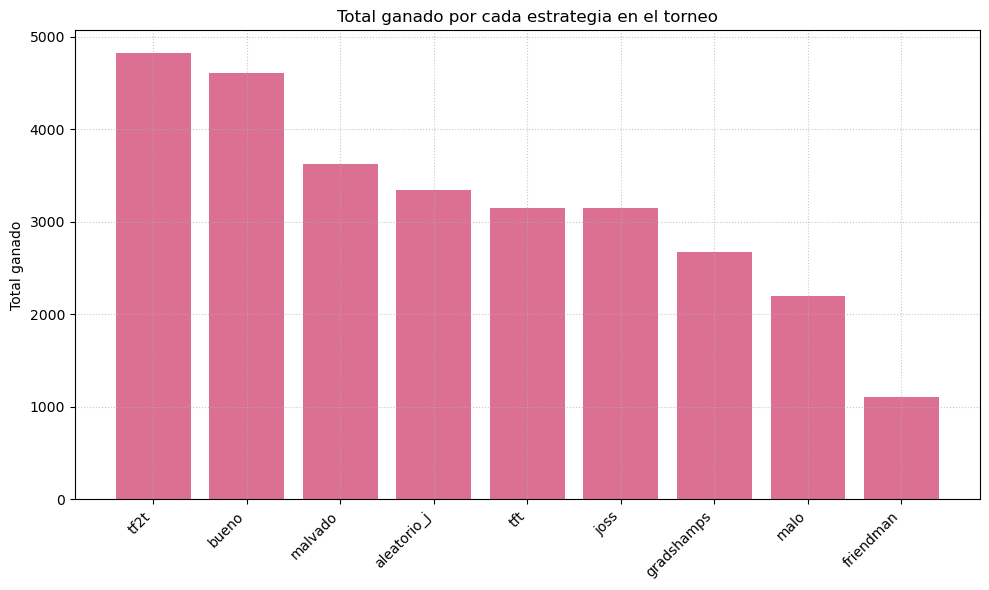

In [10]:
estrategias = [aleatorio_j, friendman, joss, gradshamps, tft, tf2t, malvado, bueno, malo]

resultados = {}

total_por_estrategia = {estr.__name__: 0 for estr in estrategias}

for j1, j2 in itertools.combinations(estrategias, 2):
    total_j1, total_j2 = corridas(9, j1, j2)
    resultados[(j1.__name__, j2.__name__)] = (total_j1, total_j2)

    total_por_estrategia[j1.__name__] += total_j1
    total_por_estrategia[j2.__name__] += total_j2
total_ordenado = dict(sorted(total_por_estrategia.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10,6))
plt.bar(total_ordenado.keys(), total_ordenado.values(), color='palevioletred')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total ganado")
plt.title("Total ganado por cada estrategia en el torneo")
plt.tight_layout()
plt.grid(linestyle=':', alpha=0.7)
plt.show()
